### Imoprting Libraries

In [136]:
import numpy as np
import pandas as pd
import os

So basically in dataset we have 12 months of data separately in each csv file so first we have to merge the data to get the yearly data to make analysis easy for us

In [137]:
#THROUGH listdir() we can get to all files
files = [file for file in os.listdir('./Sales_Data')]

#so if we check what files have
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [138]:
#making a empty dataframe to store data of a year

all_months_data = pd.DataFrame()

#now accessing those files 
for file in files:
    #we have to concatenate each csv file in all_month_data dataframe
    #firstly we have to read the file
    
    #will read each file one by one
    df = pd.read_csv('./Sales_Data/'+file)
    
    #now concatenating
    
    all_months_data= pd.concat([all_months_data, df])
    
    
#now saving it as new csv

#index = False for not saving ist index column as column :)
all_months_data.to_csv('year_data.csv', index = False)

In [139]:
#now reading the yearly data file

year_df = pd.read_csv('./year_data.csv')
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [140]:
year_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [141]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [142]:
year_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Adding some columns to make Analysis easy

#### Adding Month Column

In [143]:
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [144]:
#we have date but not month month is coving first two indecies of date

#firstly we will convert date into string so that we can get its first two characeters

year_df['Month'] = year_df['Order Date'].str[0:2]

In [145]:
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


#### Adding a City Column

In [162]:
# To get city we have a Purchase Adress where city is present right in the middle

In [163]:
#so basically we will split the Purchase Adress on commas and grab the index: 1 element to get the city

#we will use apply() method that basically helps us to apply any arbitaray function on dataframe

#so x value is the Purchase Adress column right now
year_df['City'] = year_df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [164]:
#we can also do that with a function but still we will use apply

def get_city(adress):
    return adress.split(',')[1]

#and then we can call it like

#year_df['City'] = year_df['Purchase Address'].apply(lambda x: get_city(x))

In [165]:
year_df['City'].head()

0          Dallas
2          Boston
3     Los Angeles
4     Los Angeles
5     Los Angeles
Name: City, dtype: object

#### We have to also mention the state with city because in the dataset we have many cities with same name, so state is also important

In [166]:
def get_state(adress):
    #by splitting on commas and getting second index element we will get state and postal code also
    
    state_postal = adress.split(',')[2]
    #so we have to split again on space and get ist index to properly get the state
    
    #so on the left side of space we have white space that is covering the 0th index so that is why we got state of out of
    #ist index
    
    return state_postal.split(' ')[1]


#now we have to add state in city column

year_df['City'] = year_df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

In [167]:
year_df['City'].head()

0          Dallas TX
2          Boston MA
3     Los Angeles CA
4     Los Angeles CA
5     Los Angeles CA
Name: City, dtype: object

### Data Cleaning

#### Dropping NaN Rows

In [146]:
nan_df = year_df[year_df.isna().any(axis = 1)]

In [147]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
#so now we will drop all NaN values using dropna()

#it takes parameter how --> that can have two values any and all
#any means even if even 1 column has NaN
#all means it will drop the row that has all values NaN

year_df = year_df.dropna(how = 'all')

#### Dropping on base of Condition

In [149]:
#Checking if Month have any other value than actaul month

months = ['01','02''03','04','05','06','07','08','09','10','11','12']

or_df = year_df['Month'].isin(months)


In [150]:
#the result variable will contain a pandas Series object with boolean values that 
#indicate whether each row in the 'Month' column has a value from the check_list

#so lets get those values that has some other values
false_rows = year_df.Month[~or_df]

print(false_rows)

519       Or
1149      Or
1155      Or
2878      Or
2893      Or
          ..
185164    Or
185551    Or
186563    Or
186632    Or
186738    Or
Name: Month, Length: 27483, dtype: object


#### Remvoing Or from Month Column

In [151]:
year_df = year_df[year_df['Month'] != 'Or']

In [152]:
year_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Converting Month Column type to a numeric type from string

In [153]:
year_df['Month'] = year_df['Month'].astype('int32')
year_df['Month'].head()


0    4
2    4
3    4
4    4
5    4
Name: Month, dtype: int32

#### Converting Quantity Ordered from str to numeric

In [154]:
year_df['Quantity Ordered'] = year_df['Quantity Ordered'].astype('int32')

#### Converting Price Each from str to float

In [155]:
year_df['Price Each'] = year_df['Price Each'].astype('float')

#### Adding a Sales Column

In [156]:
year_df['Sales'] = year_df['Quantity Ordered'] * year_df['Price Each']

In [157]:
year_df['Sales'].head()

0     23.90
2     99.99
3    600.00
4     11.99
5     11.99
Name: Sales, dtype: float64

### Analysis

### What was the best month for sale? 

In [158]:
sales_every_month = year_df.groupby('Month')['Sales'].sum()
sales_every_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [159]:
sales_every_month.max()

4613443.34

#### Plotting

In [160]:
import matplotlib.pyplot as plt

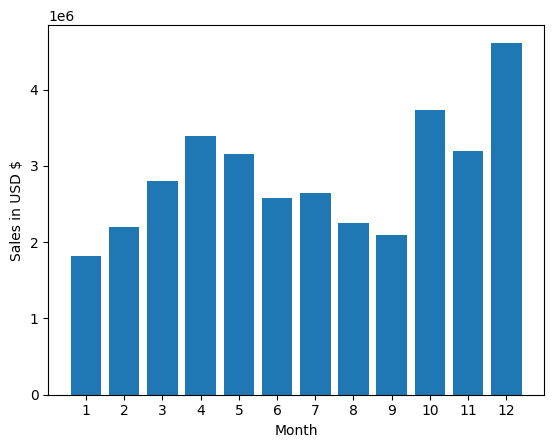

In [161]:
#xaxis
months = range(1,13)
plt.bar(months, sales_every_month);
plt.xticks(months);
plt.xlabel('Month');
plt.ylabel('Sales in USD $');

### What City had highest number of sale?

In [168]:
#lets check how our dataset look like
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [169]:
#so we will consider two columns
#Sales and City
#we will group the dataset on the base of city and then we will apply sum() operation on Sales to sum up all the sales for 
#respective cities

#so it will give me max Sale for every city
sales_of_cities = year_df.groupby('City')['Sales'].sum()
sales_of_cities

City
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Sales, dtype: float64

In [170]:
sales_of_cities.max()

8262203.91

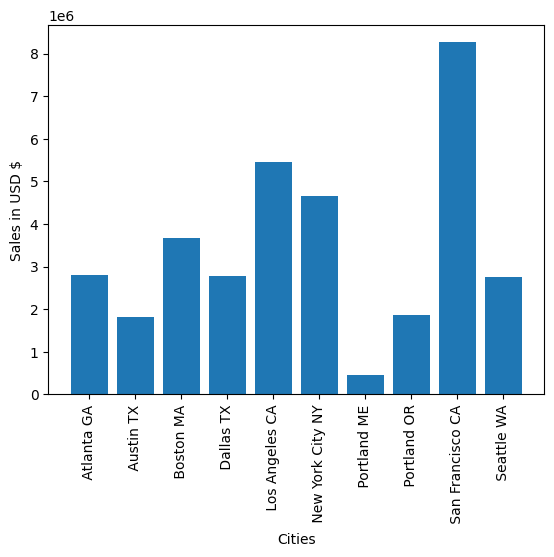

In [171]:
#we can plot that too

#so on x axis we will have names of cities
#we need the same pattern as we have in sales_of_cities 
cities = [city for city, df in year_df.groupby('City')]

plt.bar(cities, sales_of_cities)
plt.xticks(cities, rotation = 'vertical');
plt.xlabel('Cities');
plt.ylabel('Sales in USD $');

### What time should we display advertisment to maximize liklihood of customer's buying Product?

In [172]:
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [173]:
#for getting time that we have in Order Date, we can split and get it due formatting issues

#so we have to convert it to Date Time object
#and then we can easily grab Time out of it

year_df['Order Date'] = pd.to_datetime(year_df['Order Date'])

In [174]:
year_df['Order Date'].head()

0   2019-04-19 08:46:00
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
5   2019-04-30 09:27:00
Name: Order Date, dtype: datetime64[ns]

In [175]:
#so now we have that column in proper format

In [176]:
#now lets grab hour out of that column
#we will do that using .dt that can give access to hour
year_df['hour'] = year_df['Order Date'].dt.hour

#similarly we can do that for minutes
year_df['minutes'] = year_df['Order Date'].dt.minute

In [177]:
year_df[['Order Date','hour', 'minutes']].head()

,Order Date,hour,minutes
0,2019-04-19 08:46:00,8,46
2,2019-04-07 22:30:00,22,30
3,2019-04-12 14:38:00,14,38
4,2019-04-12 14:38:00,14,38
5,2019-04-30 09:27:00,9,27


In [178]:
#lets look at data now
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [179]:
#TO answer "What time should we display advertisment to maximize liklihood of customer's buying Product? " 
#We will consider Sales column and hour and minutes column

sales_with_hours = year_df.groupby('hour')['Sales'].sum()
sales_with_hours

hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

In [180]:
sales_with_hours.max()

2412938.54

Text(0, 0.5, 'Sales')

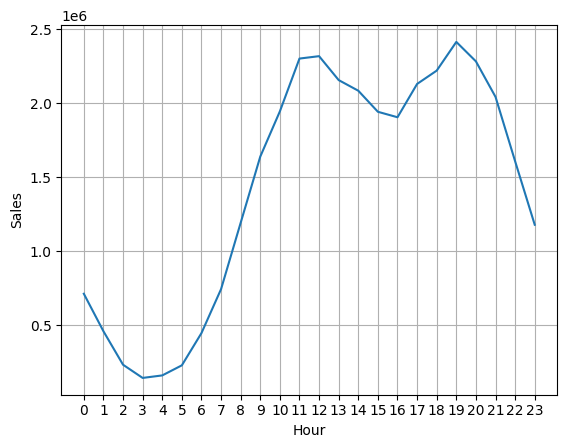

In [181]:
#lets plot the things

#this time hours will be on x axis
hours = [hour for hour, df in year_df.groupby('hour')]

plt.plot(hours, sales_with_hours);
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Sales')

Text(0, 0.5, 'Number of Orders')

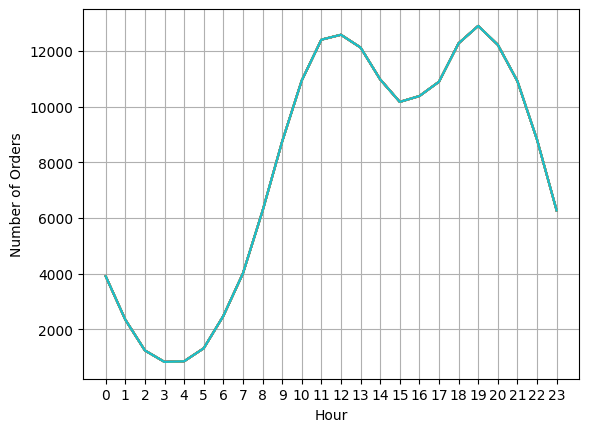

In [182]:
#we can also do same thing by counting orders for every hour 
#like:

#this time hours will be on x axis

hours = [hour for hour, df in year_df.groupby('hour')]

#so what count do is it will count the number of rows where specific hour will occur and that shows order took place at that hour

#so graph will be same
plt.plot(hours, year_df.groupby('hour').count());
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

### What Products are most often Sold Together?

In [183]:
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [184]:
#So the orders that have same order Ids are sold together like at index 3 and 4

In [185]:
#first thing we need to do is to create a dataframe that has only those items that were ordered together
#so for that we need to store those enteries where Order ID is duplicated or its same
#so we will use duplicate() function to get thos orders 

#so this dataframe will have only those rows where the Order ID is repeated (once, twice or ....)

                                        #we did keep = False to keep all the duplicates
                                        #press shift tab to check details about other parameters
dup_df = year_df[year_df['Order ID'].duplicated(keep = False)]

In [186]:
dup_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7


In [187]:
#so now what we need is, we will make seprate column where we will have products (having same ID) in the same the Row
# so we will use groupby() to group Order Id and then we will use tranform() to basically join the rows on the base grouped Ids :)


                #so group same id orders together
                                            #get there product
                                                            #and join those product semrate by ','
dup_df['Grouped Product'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_6084\3824790320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped Product'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [192]:
dup_df[['Order ID', 'Product', 'Grouped Product']].head(10)

,Order ID,Product,Grouped Product
3,176560,Google Phone,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,"Google Phone,Wired Headphones"
18,176574,Google Phone,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,"Lightning Charging Cable,USB-C Charging Cable"


In [193]:
df = dup_df[['Order ID', 'Grouped Product']]
df.head()

,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [194]:
#now we need to drop the duplicate items 

df = df.drop_duplicates()

In [195]:
df.head()

,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [196]:
#now we have to basically count the number of repeated combinations to get the answer of:

#What Products are most often Sold Together?

#for this we need to import some new libraries

from itertools import combinations
from collections import Counter

In [201]:
count = Counter()
#now we have to iterate over every row of "Grouped Product"
for row in df['Grouped Product']:
    #now we will split on ','
    row_list = row.split(',')
    #so this line below will count the Combination as they will appear in the dataframe
                                    #so 2 here shows that it will count those orders where 2 items are ordered together again and again
    count.update(Counter(combinations(row_list, 2)))

In [203]:
#printing all combinations count
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [204]:
#for top ten most repeated/most ordered combinations
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What Product Sold the most?

In [226]:
sold_item = year_df.groupby('Product')['Quantity Ordered'].sum()

In [227]:
sold_item

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [228]:
sold_item.max()

31017

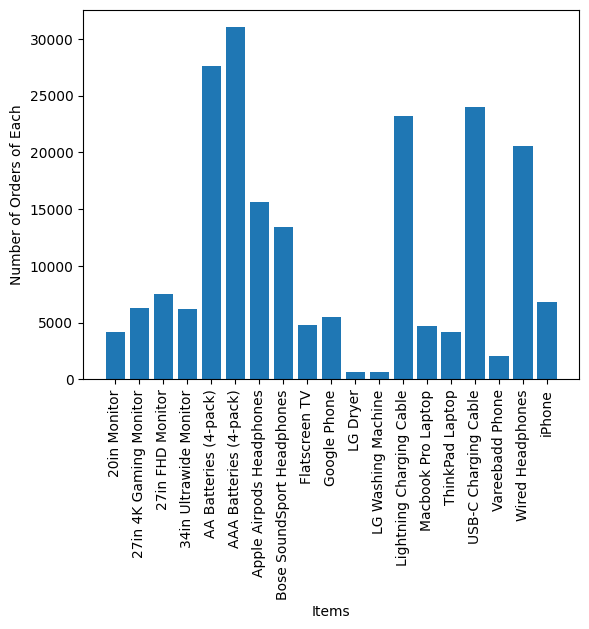

In [229]:
#we can plot that too

#so on x axis we will have names of items
items = [item for item, df in year_df.groupby('Product')]

plt.bar(items, sold_item)
plt.xticks(items, rotation = 'vertical');
plt.xlabel('Items');
plt.ylabel('Number of Orders of Each');

In [224]:
#So to make it more clear basically we can find price of each product and plot it with its number of times it got order

In [222]:
price_of_each_item= year_df.groupby('Product')['Price Each'].mean()

In [223]:
price_of_each_item

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_6084\1827761392.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(items, rotation = 'vertical');


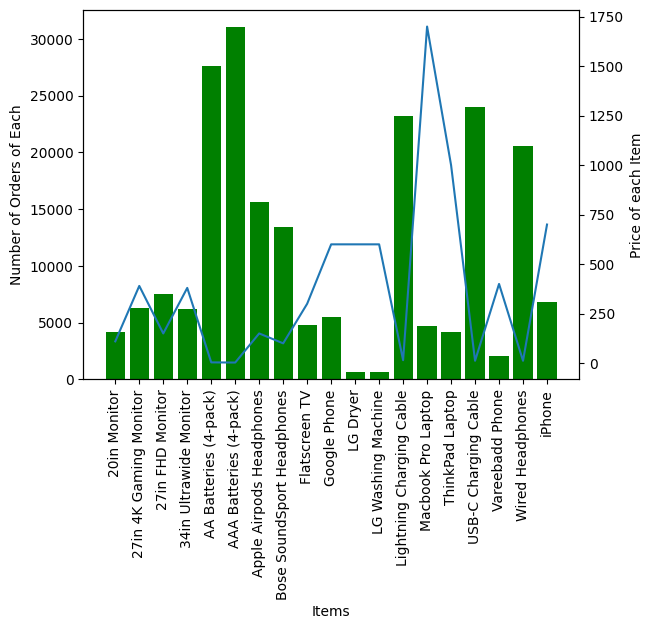

In [236]:
#for platting
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
#so our 1 y axis will sold_items
ax1.bar(items, sold_item, color = 'green')
#and other y axis will have price of items
ax2.plot(items, price_of_each_item)


ax1.set_xticklabels(items, rotation = 'vertical');
ax1.set_xlabel('Items');
ax1.set_ylabel('Number of Orders of Each');
ax2.set_ylabel('Price of each Item');

### So you can see why AAA Batteries have so much orders because its price is very low on the other hand things that have high price, have less number of orders :)